# Taller 4


In [1]:
from pathlib import Path

import cv2 as cv
import matplotlib.pyplot as plt

import numpy as np

from skimage import exposure
from skimage.util import random_noise
from skimage.filters import threshold_local
from skimage.segmentation import slic
from skimage import segmentation
from skimage.filters import prewitt_h, prewitt_v, prewitt

from skimage.filters import sobel_h, sobel_v, sobel
from skimage.feature import canny

## Punto 1


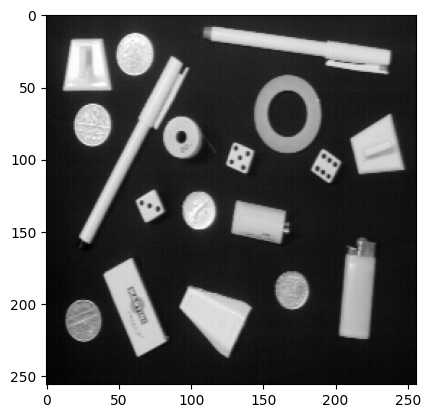

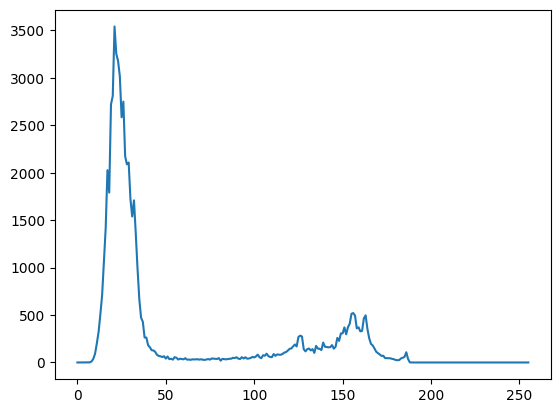

In [2]:
img_2 = [
    Path("./img/1-lineal-filter/OBJECTS.png"),
]
for img_path in img_2:
    img = cv.imread(str(img_path), cv.IMREAD_GRAYSCALE)
    plt.imshow(img, cmap="gray")
    plt.show()

    hist = cv.calcHist([img], [0], None, [256], [0, 256])
    plt.plot(hist)
    plt.show()

In [3]:
img = cv.imread(str(img_path), cv.IMREAD_GRAYSCALE)
img_int32 = img.astype(np.int32)

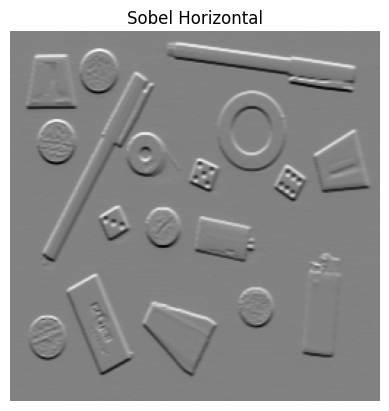

In [4]:
sobel_horizontal = sobel_h(img_int32)
plt.imshow(sobel_horizontal, cmap="gray")
plt.title("Sobel Horizontal")
plt.axis("off")
plt.show()

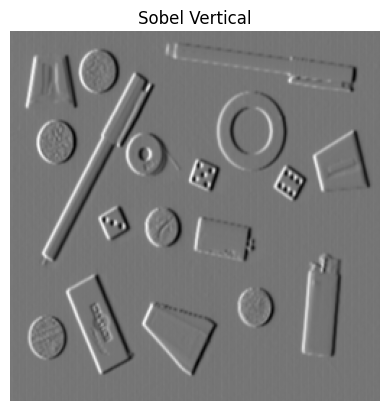

In [5]:
sobel_vertical = sobel_v(img_int32)
plt.imshow(sobel_vertical, cmap="gray")
plt.title("Sobel Vertical")
plt.axis("off")
plt.show()

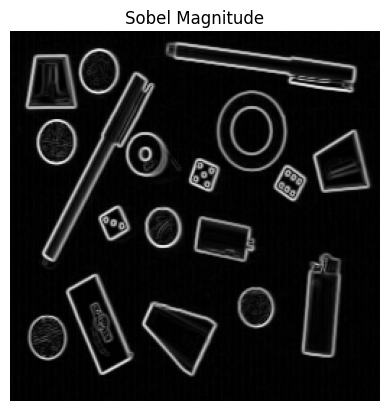

In [6]:
sobel_magnitude = np.hypot(sobel_horizontal, sobel_vertical)
plt.imshow(sobel_magnitude, cmap="gray")
plt.title("Sobel Magnitude")
plt.axis("off")
plt.show()

> Describa cualitativamente cada una de estas tres imágenes

La imagen del gradiente en X (sobel_horizontal) resalta las transiciones de intensidad en la dirección horizontal. Las áreas con cambios bruscos de intensidad a lo largo de las filas aparecerán más brillantes, mientras que las áreas con poca o ninguna transición horizontal serán más oscuras.
La imagen del gradiente en Y (sobel_vertical) resalta las transiciones de intensidad
en la dirección vertical. Las áreas con cambios bruscos de intensidad a lo largo de las columnas aparecerán más brillantes, mientras que las áreas con poca o ninguna transición vertical serán más oscuras.
La imagen de la norma del gradiente (sobel_magnitude) combina la información de ambos
gradientes para resaltar las áreas con cambios significativos de intensidad en cualquier dirección. Las áreas con cambios bruscos en ambas direcciones aparecerán más brillantes, mientras que las áreas con poca o ninguna transición serán más oscuras. Esta imagen proporciona una representación más completa de los bordes y detalles presentes en la imagen original.


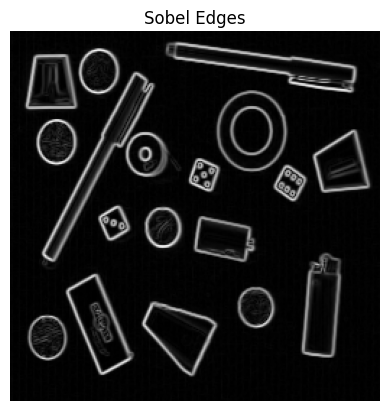

In [7]:
sobel_edges = sobel(img_int32)
plt.imshow(sobel_edges, cmap="gray")
plt.title("Sobel Edges")
plt.axis("off")
plt.show()

> Compare la imagen con la obtenido en el punto anterior.

La imagen de magnitud de `x_sobel` y `y_sobel` y de sobel son practicamente iguales. Por lo que recopilamos en sobel tanto `x` y `y`. Y cuando hacemos la magnitud estamos precisamente haciendo eso.


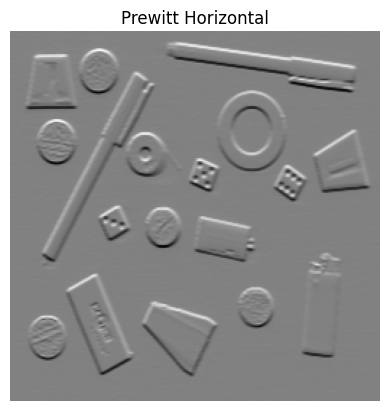

In [8]:
prewitt_horizontal = prewitt_h(img_int32)
plt.imshow(prewitt_horizontal, cmap="gray")
plt.title("Prewitt Horizontal")
plt.axis("off")
plt.show()

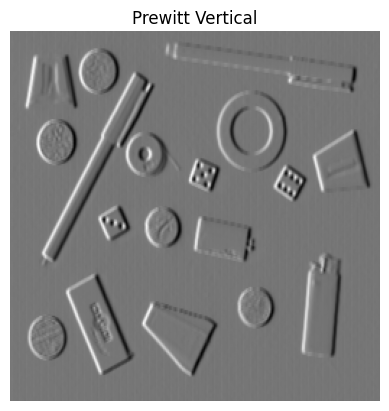

In [9]:
prewitt_vertical = prewitt_v(img_int32)
plt.imshow(prewitt_vertical, cmap="gray")
plt.title("Prewitt Vertical")
plt.axis("off")
plt.show()

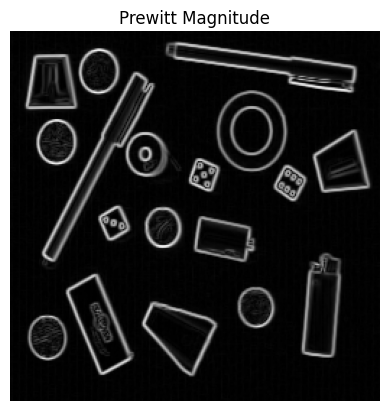

In [10]:
prewitt_magnitude = np.hypot(prewitt_horizontal, prewitt_vertical)
plt.imshow(prewitt_magnitude, cmap="gray")
plt.title("Prewitt Magnitude")
plt.axis("off")
plt.show()

> Describa cualitativamente cada una de estas tres imágenes

Imagen del gradiente en X: Muestra las diferencias horizontales en intensidad de los píxeles de la imagen original. Los bordes horizontales se ven más prominentes.
Imagen del gradiente en Y: Muestra las diferencias verticales en intensidad de los píxeles de la imagen original. Los bordes verticales se ven más prominentes.
Imagen de la norma del gradiente: Combina ambos gradientes para mostrar los bordes generales de la imagen, resaltando las transiciones de intensidad en todas las direcciones.


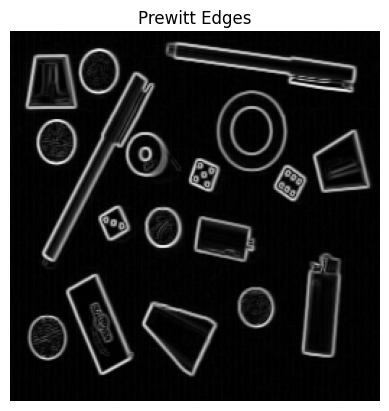

In [11]:
prewitt_edges = prewitt(img_int32)
plt.imshow(prewitt_edges, cmap="gray")
plt.title("Prewitt Edges")
plt.axis("off")
plt.show()

> Compare la imagen con la obtenido en el punto anterior.

De igual manera vemos el mismo fenomeno con prewitt, la magnitud de `x` y `y` es equivalente a prewitt.


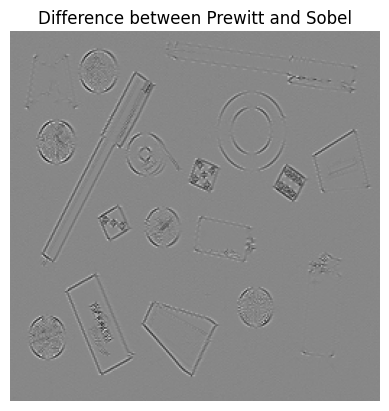

In [12]:
sobel_edges = sobel(img_int32)
prewitt_edges = prewitt(img_int32)
difference = prewitt_edges - sobel_edges
plt.imshow(difference, cmap="gray")
plt.title("Difference between Prewitt and Sobel")
plt.axis("off")
plt.show()

> ¿Qué diferencia visual hay entre el operador de Sobel y el de Prewitt?

El operador de Sobel utiliza una máscara de convolución que da más peso a los píxeles cercanos al centro, lo que resulta en una detección de bordes más suave y menos sensible al ruido. En cambio, el operador de Prewitt utiliza una máscara de convolución uniforme, lo que puede resultar en una detección de bordes más nítida pero también más sensible al ruido. En la imagen resultante, el operador de Sobel puede mostrar bordes más suaves y menos definidos, mientras que el operador de Prewitt puede mostrar bordes más nítidos pero con más ruido.


In [13]:
cases = {
    "Frontera horizontal (negro/blanco)": np.array(
        [
            [0, 0, 0],
            [0, 0, 0],
            [255, 255, 255],
        ],
        dtype=np.float64,
    ),
    "Frontera vertical (negro/blanco)": np.array(
        [
            [0, 0, 255],
            [0, 0, 255],
            [0, 0, 255],
        ],
        dtype=np.float64,
    ),
    "Frontera oblicua (negro/blanco)": np.array(
        [
            [0, 0, 255],
            [0, 255, 255],
            [255, 255, 255],
        ],
        dtype=np.float64,
    ),
    "Mascara lejos de frontera oblicua ([0] al centro)": np.array(
        [
            [0, 0, 0],
            [0, 0, 0],
            [0, 0, 255],
        ],
        dtype=np.float64,
    ),
}

kernels = {
    "Prewitt": {
        "Gx": np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]], dtype=np.float64),
        "Gy": np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]], dtype=np.float64),
    },
    "Sobel": {
        "Gx": np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float64),
        "Gy": np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.float64),
    },
}

for case_name, patch in cases.items():
    print(f"\n=== {case_name} ===")
    print(patch.astype(int))

    for filter_name, k in kernels.items():
        gx = float(np.sum(patch * k["Gx"]))
        gy = float(np.sum(patch * k["Gy"]))
        grad = float(np.hypot(gx, gy))
        print(f"{filter_name:8s} -> Gx={gx:8.1f}, Gy={gy:8.1f}, grad_mag={grad:10.3f}")


=== Frontera horizontal (negro/blanco) ===
[[  0   0   0]
 [  0   0   0]
 [255 255 255]]
Prewitt  -> Gx=     0.0, Gy=   765.0, grad_mag=   765.000
Sobel    -> Gx=     0.0, Gy=  1020.0, grad_mag=  1020.000

=== Frontera vertical (negro/blanco) ===
[[  0   0 255]
 [  0   0 255]
 [  0   0 255]]
Prewitt  -> Gx=   765.0, Gy=     0.0, grad_mag=   765.000
Sobel    -> Gx=  1020.0, Gy=     0.0, grad_mag=  1020.000

=== Frontera oblicua (negro/blanco) ===
[[  0   0 255]
 [  0 255 255]
 [255 255 255]]
Prewitt  -> Gx=   510.0, Gy=   510.0, grad_mag=   721.249
Sobel    -> Gx=   765.0, Gy=   765.0, grad_mag=  1081.873

=== Mascara lejos de frontera oblicua ([0] al centro) ===
[[  0   0   0]
 [  0   0   0]
 [  0   0 255]]
Prewitt  -> Gx=   255.0, Gy=   255.0, grad_mag=   360.624
Sobel    -> Gx=   255.0, Gy=   255.0, grad_mag=   360.624


## Punto 2


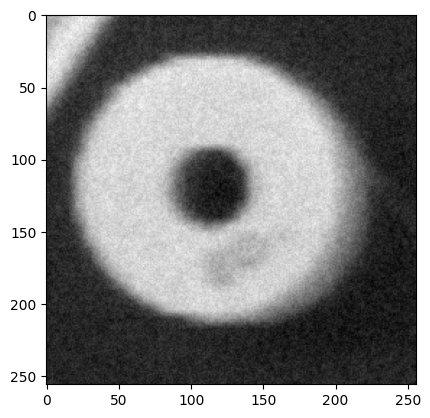

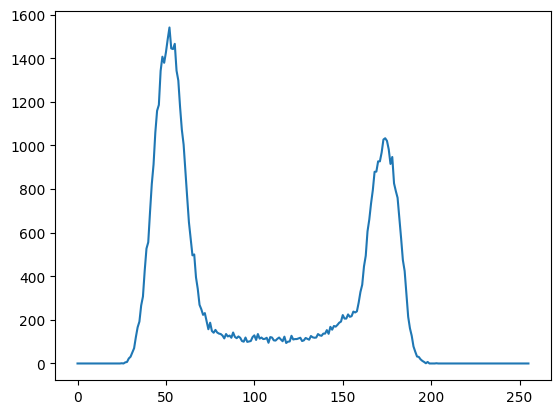

In [14]:
img_2 = [
    Path("./img/2-canny/RONDELLE.png"),
]
for img_path in img_2:
    img = cv.imread(str(img_path), cv.IMREAD_GRAYSCALE)
    plt.imshow(img, cmap="gray")
    plt.show()

    hist = cv.calcHist([img], [0], None, [256], [0, 256])
    plt.plot(hist)
    plt.show()

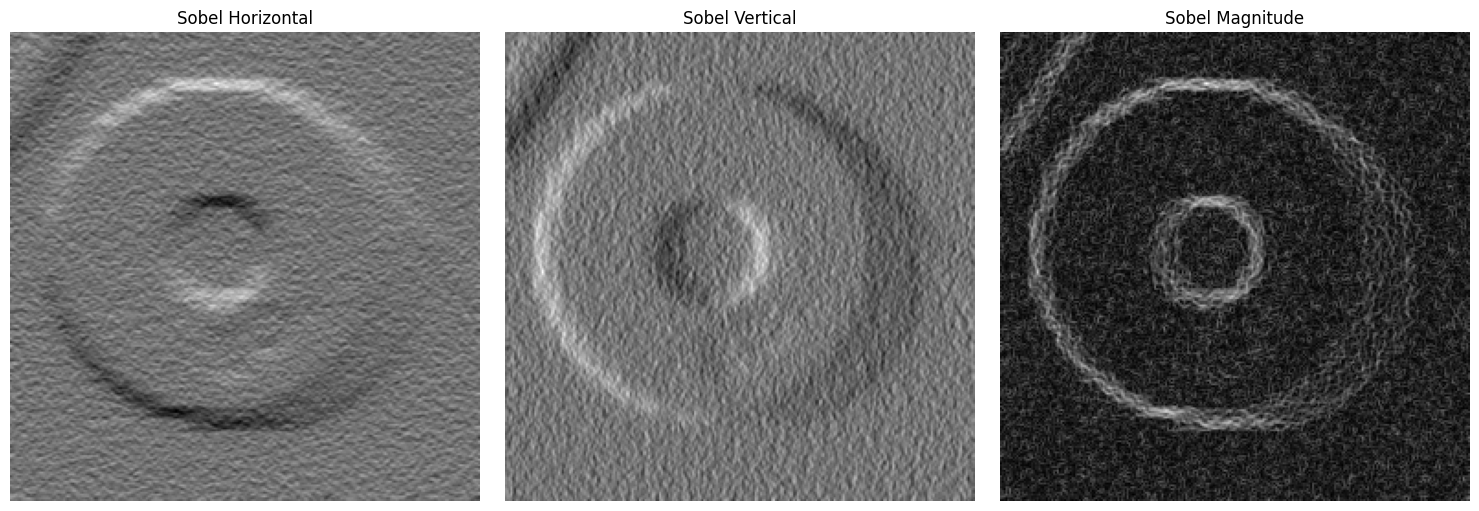

In [15]:
rondelle_img = cv.imread(img_2[0], cv.IMREAD_GRAYSCALE)
rondelle_sh = sobel_h(rondelle_img)
rondelle_sv = sobel_v(rondelle_img)
rondelle_s = sobel(rondelle_img)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(rondelle_sh, cmap="gray")
axes[0].set_title("Sobel Horizontal")
axes[0].axis("off")

axes[1].imshow(rondelle_sv, cmap="gray")
axes[1].set_title("Sobel Vertical")
axes[1].axis("off")

axes[2].imshow(rondelle_s, cmap="gray")
axes[2].set_title("Sobel Magnitude")
axes[2].axis("off")
plt.tight_layout()
plt.show()

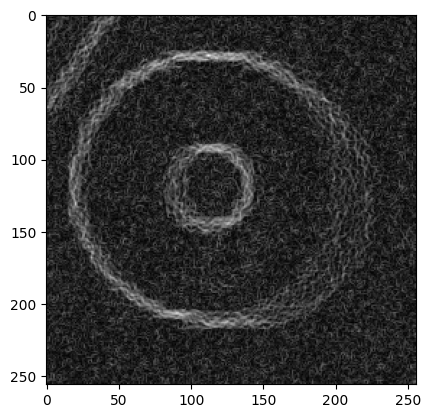

In [16]:
rondelle_s_rescaled = exposure.rescale_intensity(
    rondelle_s, in_range=(np.min(rondelle_s), np.max(rondelle_s)), out_range=(0, 255)
).astype(np.uint8)
plt.imshow(rondelle_s_rescaled, cmap="gray")
plt.show()

---


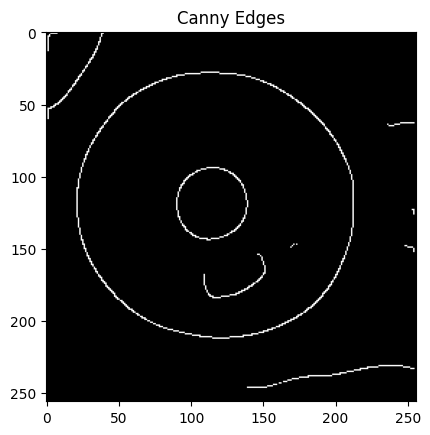

In [17]:
rondelle_edges = canny(rondelle_img, sigma=10, low_threshold=0, high_threshold=1)
plt.imshow(rondelle_edges, cmap="gray")
plt.title("Canny Edges")
plt.show()

Estos son los contornos de la imágen de rondelle. Obtenemos como resultado una imágen binaria donde el ancho de los contornos es de tan solo un pixel. Se ve correctamente el disco, la mancha en su interior, y el borde superior derecho de la imágen. Sin embargo, también se ven unos cuantos artefactos al costado derecho e inferior de la misma. Estos no son visibles en la imágen original.


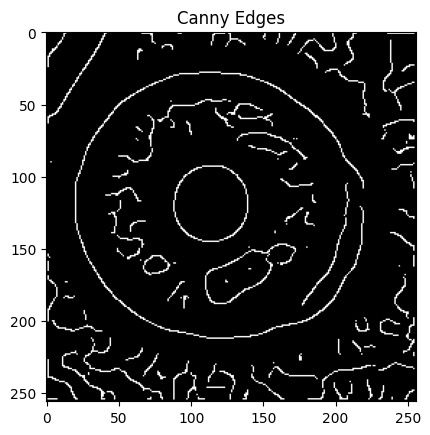

In [18]:
rondelle_edges = canny(rondelle_img, sigma=5, low_threshold=0, high_threshold=1)
plt.imshow(rondelle_edges, cmap="gray")
plt.title("Canny Edges")
plt.show()

Al reducir la desviación estándar del filtro gaussiano, notamos un incremento a la sensibilidad que tiene el algoritmo para encontrar bordes. En este caso notamos una mejor detección del contorno de la mancha dentro del disco, y asimismo notamos que ahora la sombra del disco es detectada como un borde también. Sin embargo, también notamos el incremento de artefactos cerca a los bordes de la imágen, donde en verdad no hay ningún contorno que detectar.

Esto ocurre porque la imágen inicial de rondelle es muy ruidosa y tiene contornos anchos. Por esta razón, la detección de bordes se ve beneficiada por un filtro con un $\sigma$ mas grande.

---


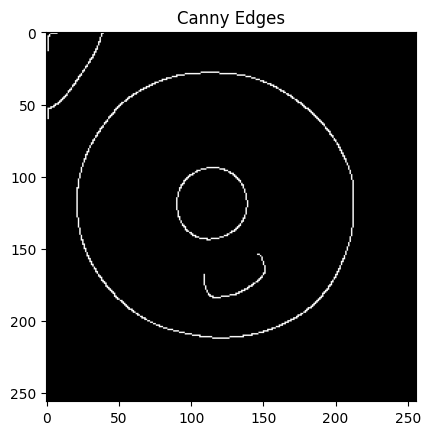

In [19]:
rondelle_edges = canny(rondelle_img, sigma=10, low_threshold=0, high_threshold=5)
plt.imshow(rondelle_edges, cmap="gray")
plt.title("Canny Edges")
plt.show()

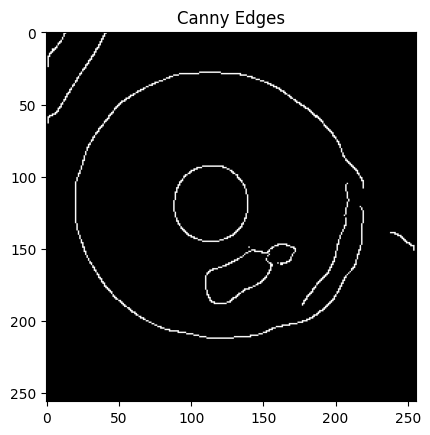

In [20]:
rondelle_edges = canny(rondelle_img, sigma=5, low_threshold=0, high_threshold=5)
plt.imshow(rondelle_edges, cmap="gray")
plt.title("Canny Edges")
plt.show()

Notamos una mejoría en la detección de bordes, al incrementar el umbral alto de la umbralización por histeresis. Esto es porque, al incrementar el umbral alto, menos contornos son seleccionados que con un umbral de 1. Nos quedamos de esta manera solo con los contornos "más significativos" y eliminamos los contornos asociados al ruido.

---


## Punto 3


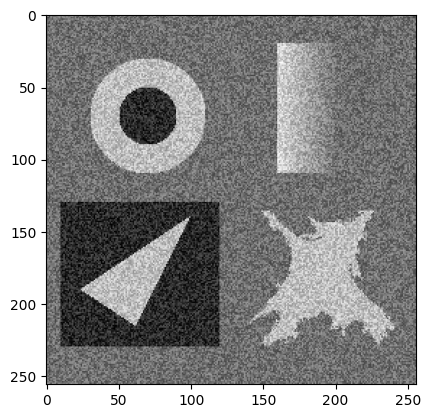

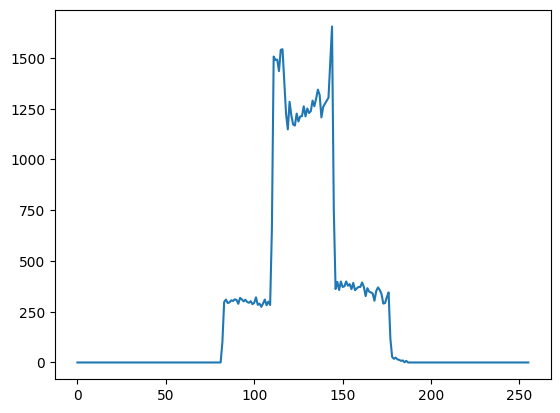

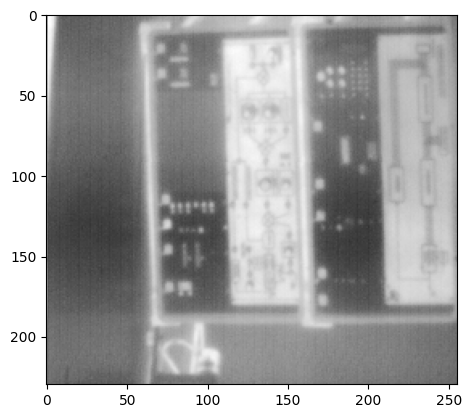

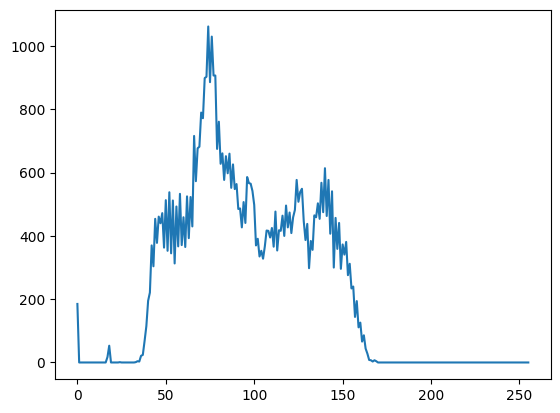

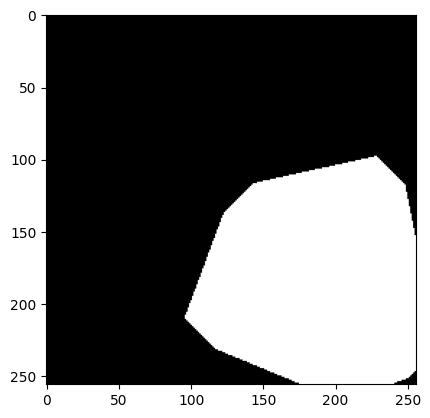

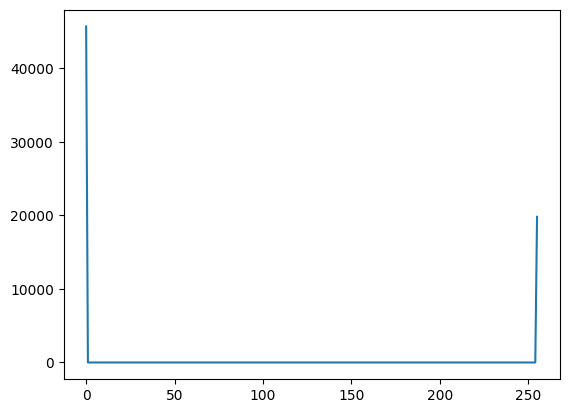

In [21]:
img_2 = [
    Path("./img/3-laplacian/BRUIT.png"),
    Path("./img/3-laplacian/FILM.png"),
    Path("./img/3-laplacian/SPOT.png"),
]
for img_path in img_2:
    img = cv.imread(str(img_path), cv.IMREAD_GRAYSCALE)
    plt.imshow(img, cmap="gray")
    plt.show()

    hist = cv.calcHist([img], [0], None, [256], [0, 256])
    plt.plot(hist)
    plt.show()

## Punto 4, Síntesis.


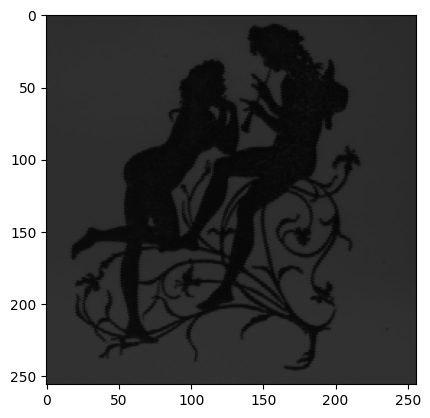

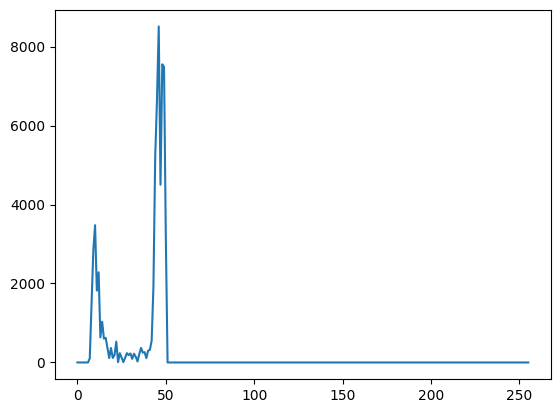

In [22]:
img_4 = [
    Path("./img/4-sintesis/AMOUR.png"),
]
for img_path in img_4:
    img = cv.imread(img_path)
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.show()

    hist = cv.calcHist([img], [0], None, [256], [0, 256])
    plt.plot(hist)
    plt.show()

In [23]:
amour_img = cv.imread(img_4[0], cv.IMREAD_GRAYSCALE)

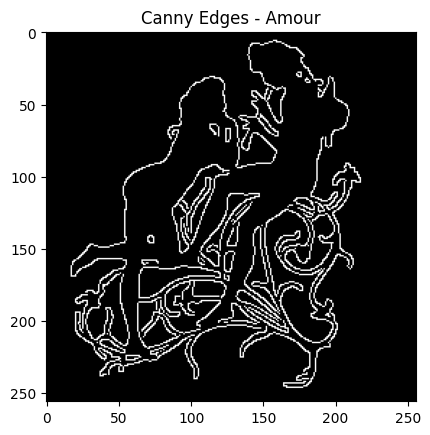

In [24]:
amour_edges = canny(amour_img, sigma=1, low_threshold=0, high_threshold=25)
plt.imshow(amour_edges, cmap="gray")
plt.title("Canny Edges - Amour")
plt.show()

In [25]:
amour_img, amour_edges

(array([[ 0, 45, 45, ..., 42, 42, 42],
        [45, 45, 45, ..., 42, 42, 42],
        [45, 45, 45, ..., 42, 42, 42],
        ...,
        [49, 49, 49, ..., 49, 49, 49],
        [49, 49, 49, ..., 49, 49, 49],
        [49, 49, 49, ..., 49, 49, 49]], shape=(256, 256), dtype=uint8),
 array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]], shape=(256, 256)))

In [26]:
amour_edges = amour_edges.astype(np.uint8) * 255
amour_edges

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(256, 256), dtype=uint8)

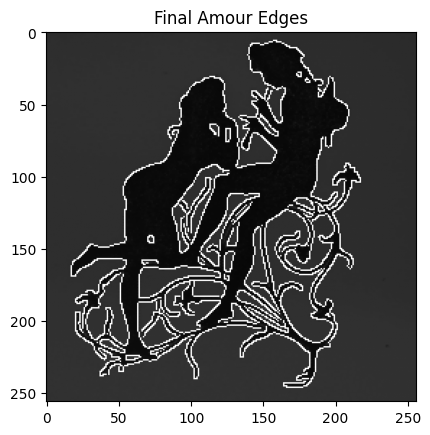

In [27]:
amour_final = cv.bitwise_or(amour_edges, amour_img)
plt.imshow(amour_final, cmap="gray")
plt.title("Final Amour Edges")
plt.show()

Para lograr el resultado final, se aplicó el operador Canny a la imagen de "Amour" con un sigma de 1 y umbrales de 0 y 25. Se tomó un sigma pequeño porque la imágen inicial no tenía mucho ruido. Por otro lado, se eligió un umbral alto de 25, ya que la imagen tenía bordes muy definidos y no se quería incluir bordes adicionales que pudieran ser causados por ruido o detalles menores. Mediante prueba y error este fue el que dio los mejores resultados. Umbrales alto menores a 25 resultaban en bordes adicionales que no eran relevantes.

Luego, se convirtió la imagen de bordes resultante a formato uint8 y se combinó con la imagen original utilizando una operación bitwise OR para resaltar los bordes en la imagen final. Al usar un OR, no modificamos en absoluto los colores originales de la imágen, solo los de sus bordes, provenientes de una imágen binaria.
